In [1]:
import pandas as pd  #
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Caricare il dataset Iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# EDA (Exploratory Data Analysis)

In [5]:
# Esplorazione iniziale
print("Informazioni sul dataset:")
print(data.info())  # Controlla la struttura del dataset
print("\nStatistiche descrittive:")
print(data.describe())  # Statistiche sulle caratteristiche numeriche

Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Statistiche descrittive:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

In [6]:
# Verifica valori mancanti
print("Valori mancanti:")
print(data.isnull().sum())

Valori mancanti:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


#Funzione **pairplot** di Seaborn:
Aiuta a identificare caratteristiche utili per la classificazione, a comprendere le relazioni tra le caratteristiche e a visualizzare graficamente la separabilità delle classi.
Grafici nella diagonale utilizzano la curva KDE (Kernel Density Estimation):
- Quando le curve delle distribuzioni per le diverse classi (in questo caso 0, 1, 2) sono chiaramente separate, significa che:
  * La caratteristica rappresentata è molto discriminante per distinguere le classi. Sono buoni predittori per il modello (nel nostro caso Petal length e Petal width ).

- Quando le curve delle distribuzioni si sovrappongono tra le classi, significa che:
  * La caratteristica rappresentata da sola non è molto discriminante per separare le classi. Più classi condividono gli stessi range di valori per questa caratteristica, rendendo più difficile distinguere una classe dall'altra. Potrebbe diventare utile in combinazione con altre caratteristiche, specialmente se esistono correlazioni.

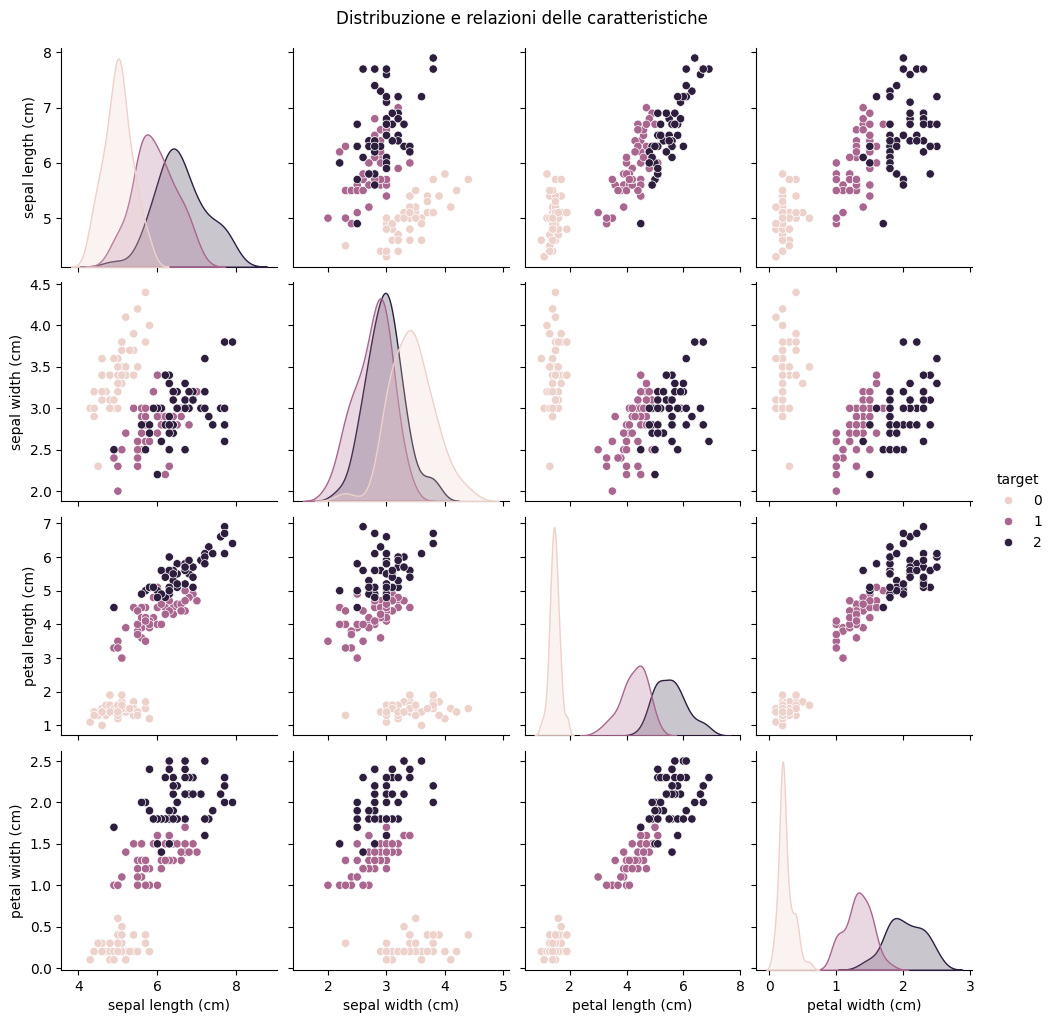

In [15]:
# Visualizzare le distribuzioni delle caratteristiche e le loro relazioni
# pairplot di Seaborn:
# 1. Mostra le relazioni tra tutte le combinazioni di due caratteristiche (scatter plot).
# 2. Mostra la distribuzione di ogni caratteristica lungo la diagonale.
sns.pairplot(data, hue='target', diag_kind='kde')
plt.suptitle("Distribuzione e relazioni delle caratteristiche", y=1.02)
plt.show()


Distribuzione del target:
target
0    50
1    50
2    50
Name: count, dtype: int64


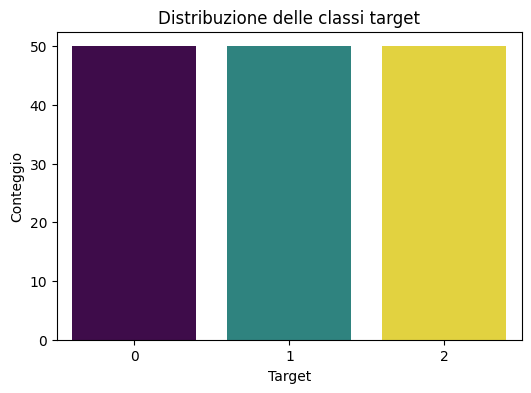

In [12]:
# Distribuzione del target
label_counts = data['target'].value_counts()
print("\nDistribuzione del target:")
print(label_counts)

# Grafico a barre della distribuzione del target
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis', legend=False, hue=label_counts.index)
plt.title("Distribuzione delle classi target")
plt.xlabel("Target")
plt.ylabel("Conteggio")
plt.show()
